In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

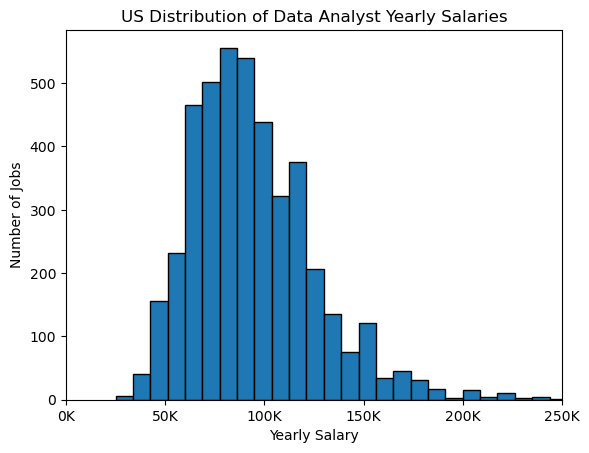

In [6]:
ax = plt.gca()
df_US["salary_year_avg"].plot(kind="hist", bins=40, edgecolor="black")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))

plt.xlim(0, 250000)
plt.title("US Distribution of Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.show()

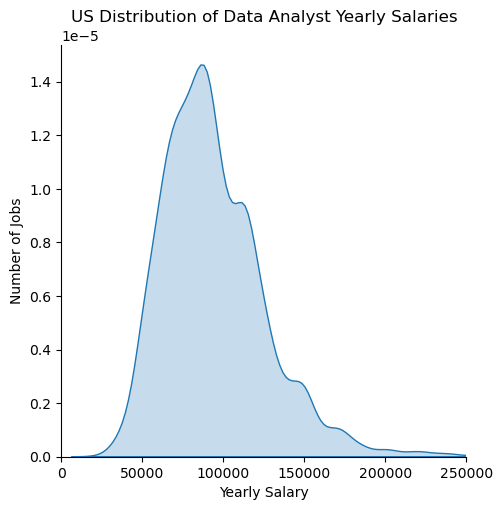

In [11]:
#Using Seaborn Plot Method
import seaborn as sns
sns.displot(df_US["salary_year_avg"], kind="kde", fill=True)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))

plt.xlim(0, 250000)
plt.title("US Distribution of Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.show()